# BIRCH clustering algorithm

Learn how to detect anomalous CPU behavior using the [BIRCH algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html) from [scikit-earn](https://scikit-learn.org/stable/index.html) with [ADTK library](https://adtk.readthedocs.io/en/stable/).

## What is BIRCH?

"BIRCH (balanced iterative reducing and clustering using hierarchies) is an unsupervised data mining algorithm used to perform hierarchical clustering over particularly large data-sets. ... Its inventors claim BIRCH to be the "first clustering algorithm proposed in the database area to handle 'noise' (data points that are not part of the underlying pattern) effectively",[1] beating DBSCAN by two months. The algorithm received the SIGMOD 10 year test of time award in 2006.[2]" — ["BIRCH"](https://en.wikipedia.org/wiki/BIRCH), Wikipedia

## Benefits of BIRCH

"Existing data clustering methods do not adequately address the problem of processing large datasets with a limited amount of resources (i.e. memory and cpu cycles). In consequence, as the dataset size increases, they scale poorly in terms of running time, and result quality. At a high level, Balanced Iterative Reducing and Clustering using Hierarchies, or BIRCH for short, deals with large datasets by first generating a more compact summary that retains as much distribution information as possible, and then clustering the data summary instead of the original dataset. BIRCH actually complements other clustering algorithms by virtue if the fact that different clustering algorithms can be applied to the summary produced by BIRCH. BIRCH can only deal with metric attributes (similar to the kind of features KMEANS can handle). A metric attribute is one whose values can be represented by explicit coordinates in an Euclidean space (no categorical variables)." —["BIRCH Clustering Algorithm Example In Python"](https://towardsdatascience.com/machine-learning-birch-clustering-algorithm-clearly-explained-fb9838cbeed9) by Cory Maklin

## Step One:

Run the next cell to import dependencies.

In [1]:
import numpy as np
import pandas as pd
from numpy import sqrt
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from adtk.detector import MinClusterDetector
from sklearn.cluster import Birch
from adtk.visualization import plot

## Step Two:  Convert data to a DataFrame 

Convert data from one of the following sources:

- InfluxDB 

- CSV


### To convert from InfluxDB

Use the Python InfluxDB Client to query data and return it as a Panda DataFrame. For more information, [Getting Started with InfluxDB and Pandas](../Getting_Started_with_InfluxDB_and_Pandas.ipynb). Then continue to Step 3.

### To convert from CSV

Run the following code to convert csv data to a Panda DataFrame:

In [2]:
df = pd.read_csv("./sample_data/BIRCH.csv")
df.head()

,_time,cpu-total,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7,result,table
0,2020-06-18 18:00:04+00:00,12.310961,24.124124,5.700000,21.021021,4.100000,19.58042,3.4,17.482517,3.096903,_result,0
1,2020-06-18 18:00:14+00:00,12.298463,25.500000,4.700000,21.778222,3.696304,19.61962,3.3,17.200000,2.600000,_result,0
2,2020-06-18 18:00:24+00:00,12.173478,24.324324,5.394605,20.920921,4.104104,19.10000,3.4,17.000000,3.100000,_result,0
3,2020-06-18 18:00:34+00:00,11.979492,23.453094,5.405405,21.500000,3.900000,18.80000,3.5,16.316316,3.000000,_result,0
4,2020-06-18 18:00:44+00:00,10.750000,23.523524,3.996004,19.600000,2.400000,17.20000,2.1,15.500000,1.700000,_result,0


## Step Three: Prepare Data

To prepare the DataFrame to be consumed by the [ADTK MinClusterDetector](https://adtk.readthedocs.io/en/stable/notebooks/demo.html#MinClusterDetector), run the following code to do the following:

- Drop extraneous columns
- Convert the timestamp to a [datetime object](https://docs.python.org/3/library/datetime.html)
- Move the timestamp column to the index

In [3]:
df["_time"] = pd.to_datetime(df["_time"].astype(str))
df = df.drop(columns=["result", "table"])
df = df.set_index("_time")
df.head()

,cpu-total,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
_time,,,,,,,,,
2020-06-18 18:00:04+00:00,12.310961,24.124124,5.700000,21.021021,4.100000,19.58042,3.4,17.482517,3.096903
2020-06-18 18:00:14+00:00,12.298463,25.500000,4.700000,21.778222,3.696304,19.61962,3.3,17.200000,2.600000
2020-06-18 18:00:24+00:00,12.173478,24.324324,5.394605,20.920921,4.104104,19.10000,3.4,17.000000,3.100000
2020-06-18 18:00:34+00:00,11.979492,23.453094,5.405405,21.500000,3.900000,18.80000,3.5,16.316316,3.000000
2020-06-18 18:00:44+00:00,10.750000,23.523524,3.996004,19.600000,2.400000,17.20000,2.1,15.500000,1.700000


## Step Four: Apply BIRCH

Use the [ADTK MinClusterDetector](https://adtk.readthedocs.io/en/stable/notebooks/demo.html#MinClusterDetector) function to apply [sklearn's BIRCH algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html) to the data.

[<AxesSubplot:>]

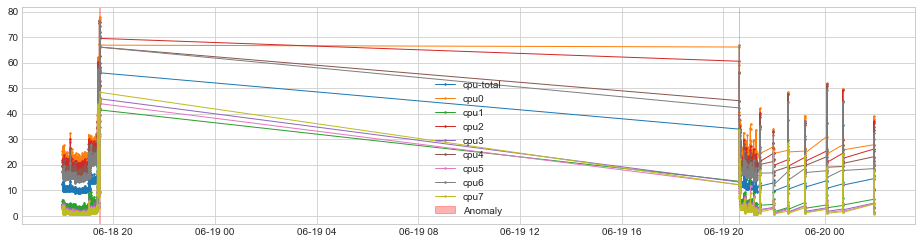

In [4]:
from adtk.detector import MinClusterDetector
from sklearn.cluster import Birch
from adtk.visualization import plot
min_cluster_detector = MinClusterDetector(Birch(n_clusters=10))
anomalies = min_cluster_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')


BIRCH has detected several anomalies. To zoom into the anomolies detected at 06-18-20 and 06-19-18, run the following code:

[<AxesSubplot:>]

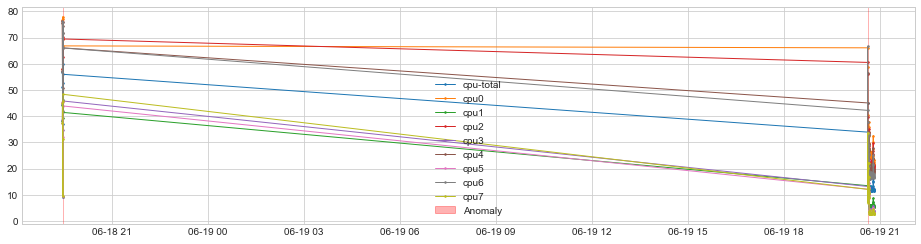

In [5]:
plot(df[520:600], anomaly=anomalies[520:600], ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')